In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import matplotlib
from scipy.stats import linregress
from fourpopdend import fourpop_dend
import scipy.io as io
import pickle

In [2]:
def plot_mean_rates(model, ax, n_trials):
    rate_1 = []
    rate_2 = []
    # generate random numbers just in case
    rand_arr = np.random.rand(n_trials)
    num_correct = 0
    n_tot = n_trials
    a = 50
    for i in range(n_trials):    
        # Control
        dat1 = model.run(seed=i+5)
        time = dat1['t'].reshape(-1,5).T[0]
        ax.plot(time[a:],np.mean(dat1['r'][0].reshape(-1, 5), axis=1)[a:], color = '#f434e7', alpha = 0.1)
        ax.plot(time[a:],np.mean(dat1['r'][1].reshape(-1,5), axis=1)[a:], color = '#545a5e',  alpha = 0.1)
        
        rate_1.append(np.mean(dat1['r'][0].reshape(-1, 5), axis=1))
        rate_2.append(np.mean(dat1['r'][1].reshape(-1,5), axis=1))

        rate_diff = np.mean(np.mean(dat1['r'][1].reshape(-1, 5), axis=1)[-100:-1]) - np.mean(np.mean(dat1['r'][0].reshape(-1, 5), axis=1)[-100:-1])
        if rate_diff > 10:
            num_correct += 1
        elif np.abs(rate_diff) < 10:
            # make a random choice
            if rand_arr[i] < 0.5:
                num_correct += 1
                
    ax.plot(time[a:], np.mean(np.array(rate_1), axis=0)[a:], color='#f434e7', label='Choice 1')
    ax.plot(time[a:], np.mean(np.array(rate_2), axis=0)[a:], color = '#545a5e', label='Choice 2')
    plt.legend(['Choice 1', 'Choice 2'], bbox_to_anchor=(1,0.9))

    return num_correct/n_tot

def get_acc(model, n_trials):
    num_correct = 0
    n_tot = n_trials
    rand_arr = np.random.rand(n_trials)

    for i in range(n_trials):    
        # Control
        dat1 = model.run(seed=i+5)

        rate_diff = np.mean(np.mean(dat1['r'][1].reshape(-1, 5), axis=1)[-100:-1]) - np.mean(np.mean(dat1['r'][0].reshape(-1, 5), axis=1)[-100:-1])
        if rate_diff > 10:
            num_correct += 1
        elif np.abs(rate_diff) < 10:
            # make a random choice
            if rand_arr[i] < 0.5:
                num_correct += 1
                
    return num_correct/n_tot

/Users/hc793/miniconda3/envs/spine-env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/hc793/miniconda3/envs/spine-env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


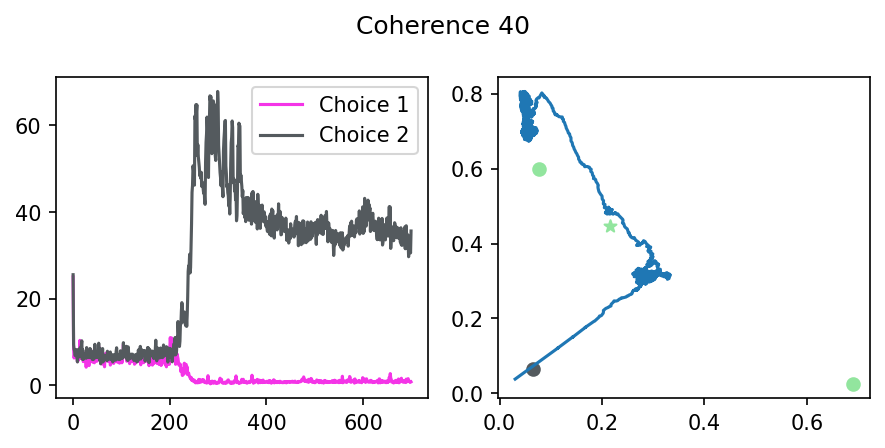

In [3]:
# Test run
# Test Run with Phase Space Trajectory

run1 = fourpop_dend(GRIK4=1., D2=np.array([1., 1.]), custom_args={'coh':40, 'n_pulse': 20}) # This will use default parameters
dat1 = run1.run()

def plot_fixed_points(model, full=False):
    fig, axs = plt.subplots(1,2, figsize = (6,3), dpi=150)

    dat1 = model.run()
    fig.suptitle('Coherence {}'.format(model.p['coh']))
    axs[0].plot(np.mean(dat1['r'][0].reshape(-1, 5), axis=1), color = '#f434e7', label = 'Choice 1')
    axs[0].plot(np.mean(dat1['r'][1].reshape(-1,5), axis=1), color = '#545a5e', label = 'Choice 2')
    axs[0].legend()

    fp_u = model.get_fixed_points(ifstim=False)
    fp_s = model.get_fixed_points(ifstim=True)

    for j, point in enumerate(fp_u['points']):
        if fp_u['stable'][j] == 1:
            axs[1].scatter(point[0], point[1],c='#545a5e')
        else:
            axs[1].scatter(point[0], point[1], marker = '*',c='#545a5e')
    for j, point in enumerate(fp_s['points']):
        if fp_s['stable'][j] == 1:
            axs[1].scatter(point[0], point[1],c='#92e59e')
        else:
            axs[1].scatter(point[0], point[1], marker = '*',c='#92e59e')

    axs[1].plot(dat1['S'][0], dat1['S'][1])
    plt.tight_layout()
    if full:
        fig, axs = plt.subplots(1,2, figsize=(6,3))
        axs[0].plot(dat1['rvs'][0], label='vip1')
        axs[0].plot(dat1['rvs'][1], label='vip2')
        axs[0].legend()
        axs[1].plot(dat1['rvs'][2], label='som1')
        axs[1].plot(dat1['rvs'][3], label='som2')

        plt.subplots()
        plt.title("Idend")
        plt.plot(dat1['Idend'][0]*gD)
        plt.plot(dat1['Idend'][1]*gD)

        plt.subplots()
        plt.title("VD")
        plt.plot(dat1['VD'][0])
        plt.plot(dat1['VD'][1])

plot_fixed_points(run1)



# In a high conflict trial, increased PV inhibition 

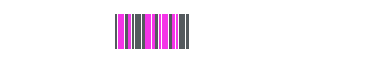

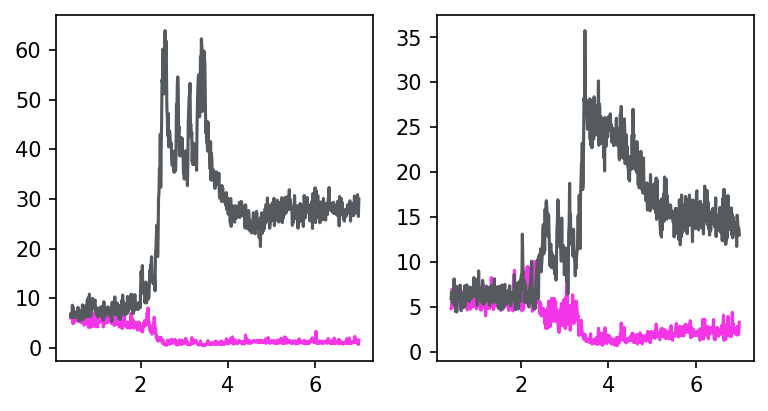

In [4]:
# A single run of a high conflict trial
seed = 7
control_params = {'coh':48,'n_pulse':22}

control = fourpop_dend(GRIK4=0.25, D2=np.array([0.,0.]), custom_args=control_params)
test = fourpop_dend(GRIK4=1., D2=np.array([0.,0.]), custom_args=control_params)

ctrl_dat = control.run(seed=seed)
test_dat = test.run(seed=seed)

control.plot_stim(seed)
#test.plot_stim(seed)
a = 40
fig, axs = plt.subplots(1,2, figsize=(6,3),dpi=150)
axs[0].plot(ctrl_dat['t'].reshape(-1,5).T[0][a:], np.mean(ctrl_dat['r'][0].reshape(-1,5), axis=1)[a:], color='#f434e7', label='Choice 1')
axs[0].plot(ctrl_dat['t'].reshape(-1,5).T[0][a:], np.mean(ctrl_dat['r'][1].reshape(-1,5), axis=1)[a:], color = '#545a5e', label='Choice 2')
axs[1].plot(test_dat['t'].reshape(-1,5).T[0][a:], np.mean(test_dat['r'][0].reshape(-1,5), axis=1)[a:], color='#f434e7', label='Choice 1')
axs[1].plot(test_dat['t'].reshape(-1,5).T[0][a:], np.mean(test_dat['r'][1].reshape(-1,5), axis=1)[a:], color = '#545a5e', label='Choice 2')

Control 0.85
GRIK 0.85


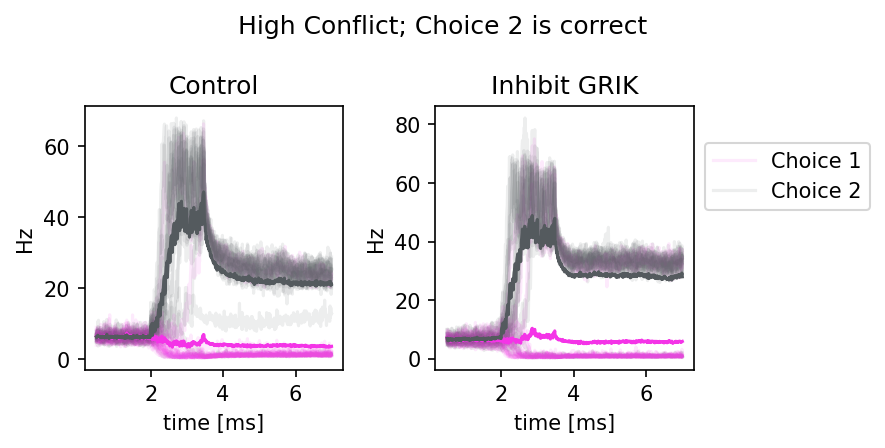

In [5]:
# In a high conflict trial, inhibiting PV inhibition by lowering GRIK4 lowers the accuracy.
# HYP Inhibiting GRIK lowers accuracy.

# It needs to make Choice 2
n_trials = 20
control_params = {'coh':40,'mu':40,'n_pulse':22, 'Gc':95.5, 'gD': 25.6}

def plot_mean_rates(model, ax, n_trials):
    rate_1 = []
    rate_2 = []

    num_correct = 0
    n_tot = n_trials
    a = 50
    for i in range(n_trials):    
        # Control
        dat1 = model.run(seed=i+5)
        time = dat1['t'].reshape(-1,5).T[0]
        ax.plot(time[a:],np.mean(dat1['r'][0].reshape(-1, 5), axis=1)[a:], color = '#f434e7', alpha = 0.1)
        ax.plot(time[a:],np.mean(dat1['r'][1].reshape(-1,5), axis=1)[a:], color = '#545a5e',  alpha = 0.1)
        
        rate_1.append(np.mean(dat1['r'][0].reshape(-1, 5), axis=1))
        rate_2.append(np.mean(dat1['r'][1].reshape(-1,5), axis=1))

        rate_diff = np.mean(np.mean(dat1['r'][1].reshape(-1, 5), axis=1)[-100:-1]) - np.mean(np.mean(dat1['r'][0].reshape(-1, 5), axis=1)[-100:-1])
        if rate_diff > 15:
            num_correct += 1
        elif np.abs(rate_diff) < 5:
            n_tot -= 1

    ax.plot(time[a:], np.mean(np.array(rate_1), axis=0)[a:], color='#f434e7', label='Choice 1')
    ax.plot(time[a:], np.mean(np.array(rate_2), axis=0)[a:], color = '#545a5e', label='Choice 2')
    plt.legend(['Choice 1', 'Choice 2'], bbox_to_anchor=(1,0.9))
    if n_tot>0:
        return num_correct/n_tot
    else:
        return nan


fig, axs = plt.subplots(1,2,figsize=(6,3),dpi=150,sharex=True,sharey=False)
fig.suptitle("High Conflict; Choice 2 is correct")

control = fourpop_dend(GRIK4=1.0, D2=np.array([1.,1.]), custom_args=control_params)
inhGRIK = fourpop_dend(GRIK4=0.1, D2 = np.array([1.,1.]), custom_args=control_params)

percent_control = plot_mean_rates(control, axs[0], n_trials)
percent_GRIK = plot_mean_rates(inhGRIK, axs[1], n_trials)
axs[0].set(title="Control", xlabel='time [ms]', ylabel='Hz')
axs[1].set(title="Inhibit GRIK",xlabel='time [ms]', ylabel='Hz')
plt.tight_layout()

print("Control", percent_control)
print("GRIK", percent_GRIK)

Control 0.7
inh D2 0.25


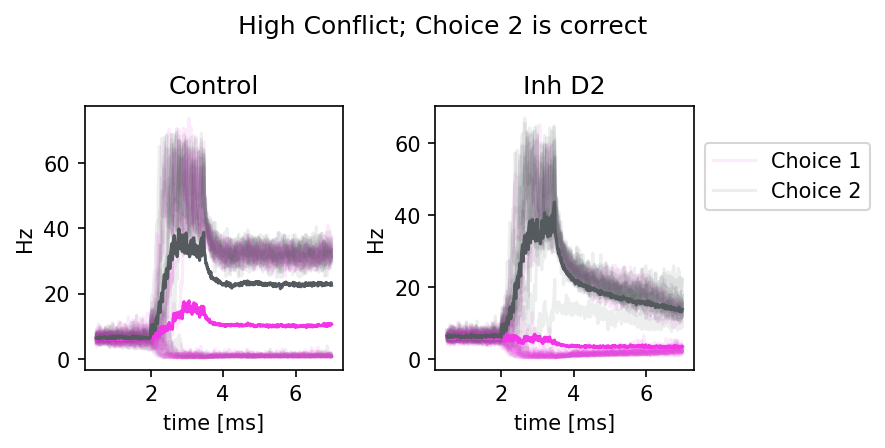

In [6]:
# In a high conflict trial, inhibiting VIP disinhibition by lowering D2 should  improve accuracy.
# HYP Inh D2 should improve accuracy

# It needs to make Choice 2
n_trials = 20
control_params = {'coh':45,'mu':40,'n_pulse':22, 'Gc':96, 'gD':25.6}

fig, axs = plt.subplots(1,2,figsize=(6,3),dpi=150,sharex=True,sharey=False)
fig.suptitle("High Conflict; Choice 2 is correct")
axs[0].set(title="Control", xlabel='time [ms]', ylabel='Hz')
axs[1].set(title="Inh D2",xlabel='time [ms]', ylabel='Hz')
control = fourpop_dend(GRIK4 = 1., D2 = np.array([1.,1.]), custom_args=control_params)
inhD2 = fourpop_dend(GRIK4=1., D2=np.array([0.4,0.4]), custom_args=control_params)

control_acc = plot_mean_rates(control, axs[0], n_trials)
inhD2_acc = plot_mean_rates(inhD2, axs[1], n_trials)

plt.tight_layout()

print("Control", control_acc)
print("inh D2", inhD2_acc)

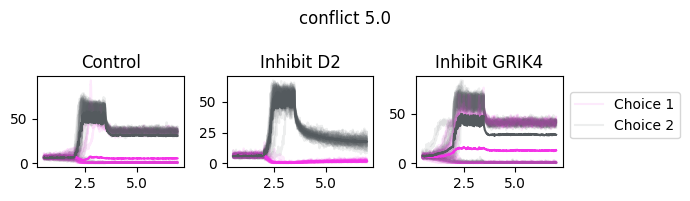

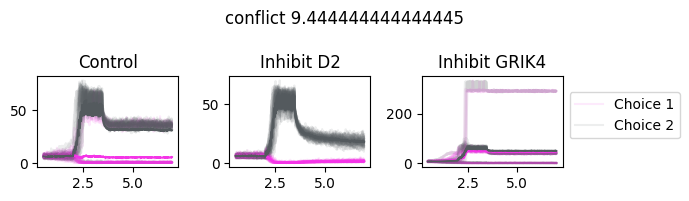

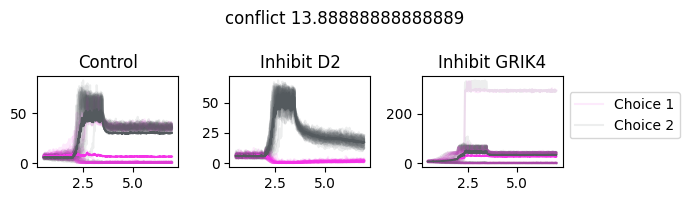

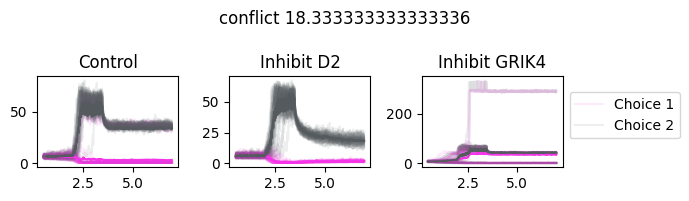

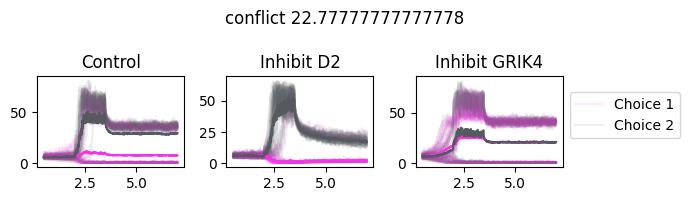

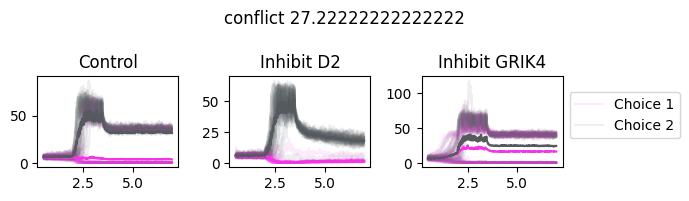

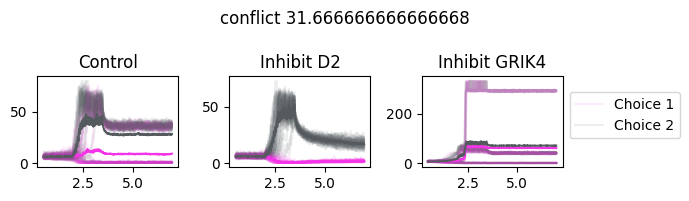

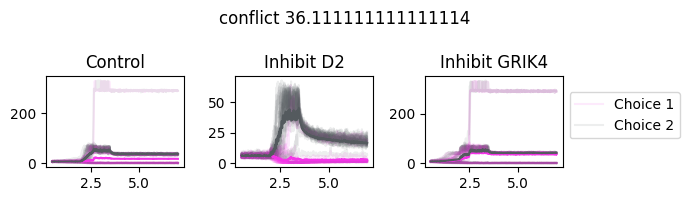

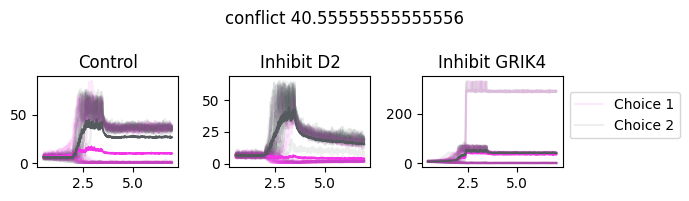

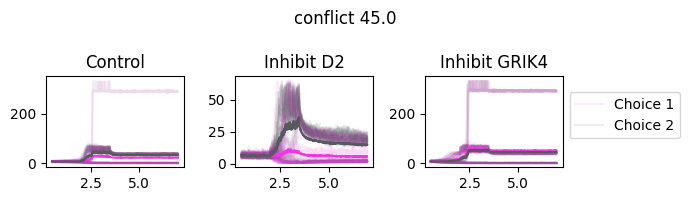

In [4]:
# Generate psychometrics for conflict
n_coh = 10
coh_array = np.linspace(5,45,n_coh)
acc_control = np.zeros(n_coh)
acc_inhG = np.zeros(n_coh)
acc_inhD = np.zeros(n_coh)

for i,coh in enumerate(coh_array):
    n_trials = 30

    control_params = {'coh':coh,'mu':40,'n_pulse':22,'gD': 25.6, 'Gc':96.5}

    ctrl_model = fourpop_dend(GRIK4 = 1.0, D2 = np.array([1.0,1.0]), custom_args=control_params)
    inhD2_model = fourpop_dend(GRIK4=1.0, D2=np.array([0.1,0.1]), custom_args=control_params)
    inhGRIK4_model = fourpop_dend(GRIK4=0.1, D2=np.array([1.0,1.0]), custom_args=control_params)

    fig, axs = plt.subplots(1,3, figsize=(7,2))
    fig.suptitle('conflict {}'.format(coh))
    acc_control[i] = plot_mean_rates(ctrl_model,axs[0],n_trials)
    acc_inhD[i] = plot_mean_rates(inhD2_model, axs[1], n_trials)
    acc_inhG[i] = plot_mean_rates(inhGRIK4_model, axs[2], n_trials)
    axs[0].set(title='Control')
    axs[1].set(title='Inhibit D2')
    axs[2].set(title='Inhibit GRIK4')
    plt.tight_layout()

# Pickle the accuracies
ctrl_dict = {'params':ctrl_model.p, 'coh':coh_array, 'acc':acc_control}
pickle.dump(ctrl_dict,open('coh_ctrl.p','wb+'))
inhD2_dict = {'params':inhD2_model.p, 'coh':coh_array, 'acc':acc_inhD}
pickle.dump(inhD2_dict, open('inhd2_coh.p', 'wb+'))
inhGRIK4_dict = {'params':inhGRIK4_model.p, 'coh':coh_array, 'acc':acc_inhG}
pickle.dump(inhGRIK4_dict, open('inhGRIK4_coh.p', 'wb+'))

[0.86666667 0.86666667 0.83333333 0.93333333 0.8        0.9
 0.76666667 0.8        0.73333333 0.63333333]


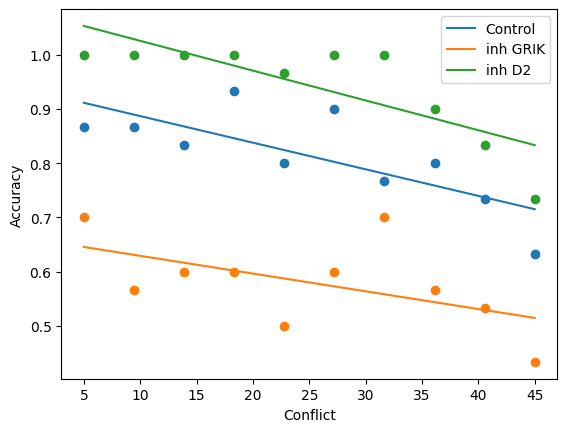

In [10]:

ctrldata = pickle.load(open('coh_ctrl.p','rb'))
inhd2data = pickle.load(open('inhd2_coh.p','rb'))
inhGRIKdata = pickle.load(open('inhGRIK4_coh.p','rb'))
coh_array = ctrldata['coh']
print(ctrldata['acc'])
ctrl_m, ctrl_b, r, p, se = linregress(coh_array, np.array(ctrldata['acc']))
GRIK_m, GRIK_b, r, p, se = linregress(coh_array, np.array(inhGRIKdata['acc']))
D2_m, D2_b, r, p, se = linregress(coh_array, np.array(inhd2data['acc']))
plt.plot(coh_array, ctrl_m*coh_array+ctrl_b, label = 'Control')
plt.plot(coh_array, GRIK_m*coh_array+GRIK_b, label= "inh GRIK")
plt.plot(coh_array, D2_m*coh_array+D2_b, label= "inh D2")
plt.legend()
plt.scatter(coh_array, ctrldata['acc'])
plt.scatter(coh_array, inhGRIKdata['acc'])
plt.scatter(coh_array, inhd2data['acc'])
plt.xlabel('Conflict')
plt.ylabel("Accuracy")
plt.savefig("Conflict.pdf")

(10,)


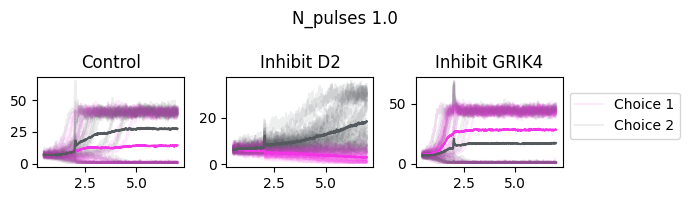

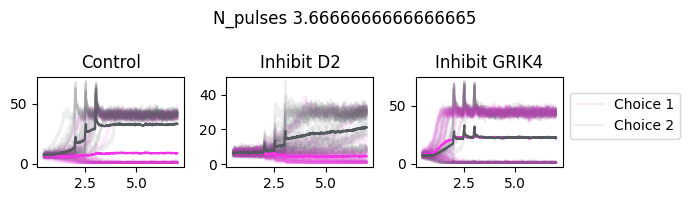

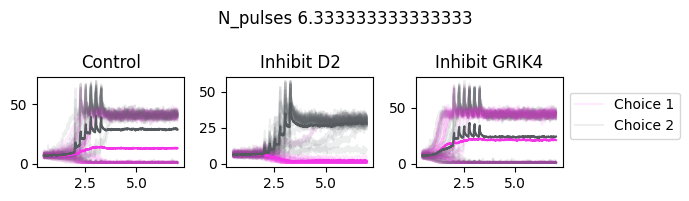

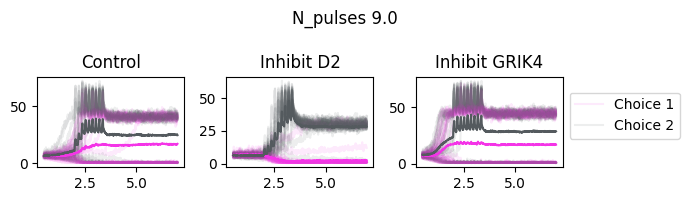

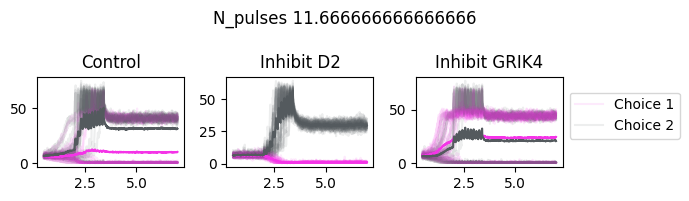

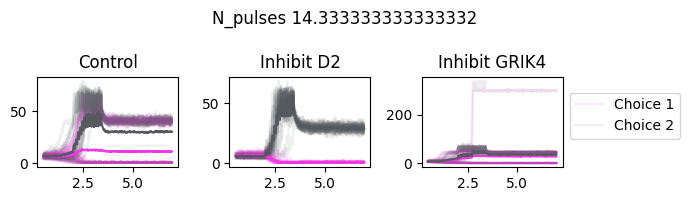

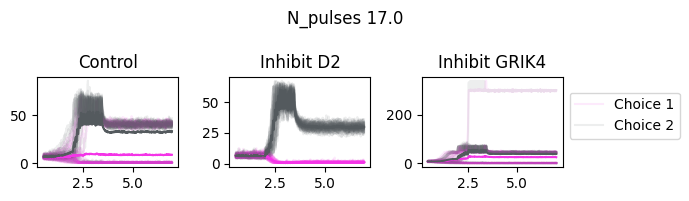

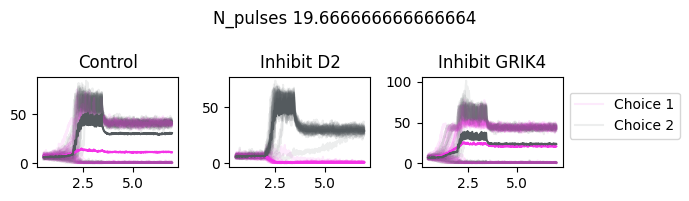

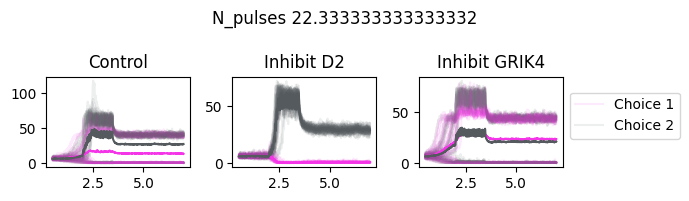

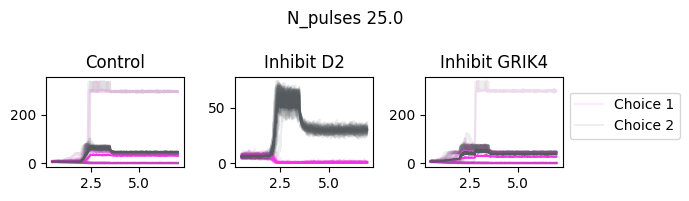

In [19]:
# Generate psychometrics for sparsity
n_samples = 10
n_pulse_arr = np.linspace(1,25,n_samples)
print(n_pulse_arr.shape)
acc_control = np.zeros(n_samples)
acc_inhG = np.zeros(n_samples)
acc_inhD = np.zeros(n_samples)

for i,n in enumerate(n_pulse_arr):
    n_trials = 30

    control_params = {'coh':10,'mu':40,'n_pulse':int(n), 'Gc':96.6, 'gD':25.7}

    ctrl_model = fourpop_dend(GRIK4 = 1.0, D2 = np.array([1.0,1.0]), custom_args=control_params)
    inhD2_model = fourpop_dend(GRIK4=1.0, D2=np.array([0.1,0.1]), custom_args=control_params)
    inhGRIK4_model = fourpop_dend(GRIK4=0.25, D2=np.array([1.0,1.0]), custom_args=control_params)
    fig, axs = plt.subplots(1,3, figsize=(7,2))
    fig.suptitle('N_pulses {}'.format(n))
    acc_control[i] = plot_mean_rates(ctrl_model,axs[0],n_trials)
    acc_inhD[i] = plot_mean_rates(inhD2_model, axs[1], n_trials)
    acc_inhG[i] = plot_mean_rates(inhGRIK4_model, axs[2], n_trials)
    axs[0].set(title='Control')
    axs[1].set(title='Inhibit D2')
    axs[2].set(title='Inhibit GRIK4')
    plt.tight_layout()

# Pickle the accuracies
ctrl_dict = {'params':ctrl_model.p, 'n_p_arr':n_pulse_arr, 'acc':acc_control}
pickle.dump(ctrl_dict,open('sp_ctrl.p','wb+'))
inhD2_dict = {'params':inhD2_model.p, 'n_p_arr':n_pulse_arr, 'acc':acc_inhD}
pickle.dump(inhD2_dict, open('inhd2_sp.p', 'wb+'))
inhGRIK4_dict = {'params':inhGRIK4_model.p, 'n_p_arr':n_pulse_arr, 'acc':acc_inhG}
pickle.dump(inhGRIK4_dict, open('inhGRIK4_sp.p', 'wb+'))

[0.66666667 0.8        0.7        0.6        0.76666667 0.73333333
 0.8        0.73333333 0.66666667 0.7       ]


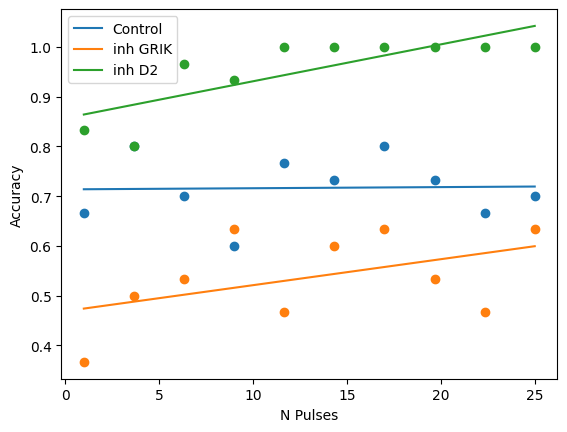

In [22]:

ctrldata = pickle.load(open('sp_ctrl.p','rb'))
inhd2data = pickle.load(open('inhd2_sp.p','rb'))
inhGRIKdata = pickle.load(open('inhGRIK4_sp.p','rb'))
n_p_arr = ctrldata['n_p_arr']
print(ctrldata['acc'])
ctrl_m, ctrl_b, r, p, se = linregress(n_p_arr, np.array(ctrldata['acc']))
GRIK_m, GRIK_b, r, p, se = linregress(n_p_arr, np.array(inhGRIKdata['acc']))
D2_m, D2_b, r, p, se = linregress(n_p_arr, np.array(inhd2data['acc']))
plt.plot(n_p_arr, ctrl_m*n_p_arr+ctrl_b, label = 'Control')
plt.plot(n_p_arr, GRIK_m*n_p_arr+GRIK_b, label= "inh GRIK")
plt.plot(n_p_arr, D2_m*n_p_arr+D2_b, label= "inh D2")
plt.legend()
plt.scatter(n_p_arr, ctrldata['acc'])
plt.scatter(n_p_arr, inhGRIKdata['acc'])
plt.scatter(n_p_arr, inhd2data['acc'])
plt.xlabel('N Pulses')
plt.ylabel("Accuracy")
plt.savefig("npulses.pdf")

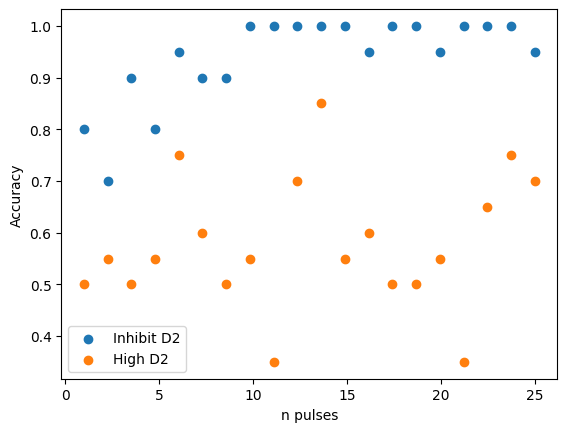

In [8]:
# Increasing sparsity
num_pulses = np.linspace(1,25,5)
acc_control = []
acc_test = []
for n in num_pulses:
    n_trials = 100
    control_params = {'coh':0,'mu':40,'n_pulse':int(n),'Tdur':1.5,'JGRIKPV':0.0055,'k':10.54, 'Gc':96.7, 'gD':25.7,'mu':40}
    #fig, axs = plt.subplots(1,2,figsize=(6,3),dpi=150,sharex=True,sharey=False)
    high_conflict_control = fourpop_dend(GRIK4 = 0.5, D2 = np.array([0.0,0.0]), custom_args=control_params)
    high_conflict_GRIK = fourpop_dend(GRIK4=0.5, D2=np.array([1.0,1.0]), custom_args=control_params)
    acc_ctrl = get_acc(high_conflict_control,n_trials)
    acc_t = get_acc(high_conflict_GRIK, n_trials)
    acc_control.append(acc_ctrl)
    acc_test.append(acc_t)
plt.scatter(num_pulses, acc_control, label = "Inhibit D2")
plt.scatter(num_pulses, acc_test, label="High D2")
plt.xlabel('n pulses')
plt.ylabel("Accuracy")
plt.legend()

# Sparse Inputs

0.6
1.0


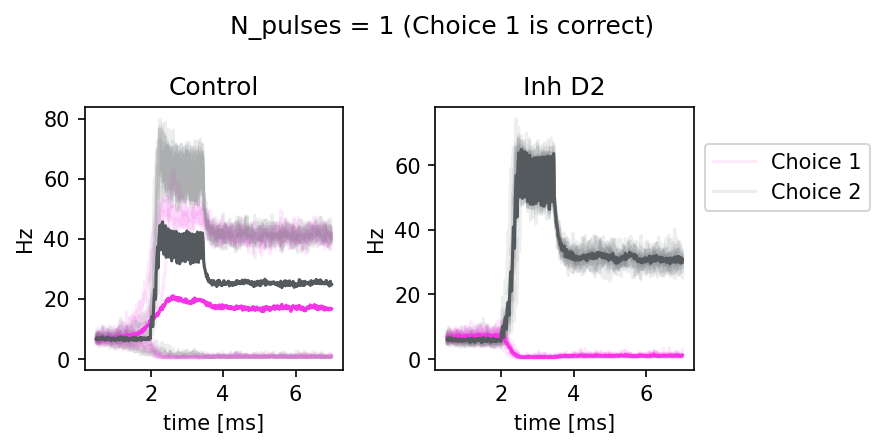

In [40]:
# Set the stimulus duration to be equal to one pulse length
sim_params = {'coh':0,'mu':40,'n_pulse':20,'Tdur':1.5,'JGRIKPV':0.0053,'k':10.54, 'Gc':96.7, 'gD':25.7,'mu':40}
n_trials = 10

fig, axs = plt.subplots(1,2,figsize=(6,3),dpi=150,sharex=True,sharey=False)
fig.suptitle("N_pulses = 1 (Choice 1 is correct)")
axs[0].set(title="Control", xlabel='time [ms]', ylabel='Hz')
axs[1].set(title="Inh D2",xlabel='time [ms]', ylabel='Hz')

sparse_sim = fourpop_dend(1, np.array([1.,1.]), custom_args=sim_params)
sparse_sim_d2 = fourpop_dend(1, np.array([.1,.1]), custom_args=sim_params)

control_acc = plot_mean_rates(sparse_sim, axs[0], n_trials)
inhd2_acc = plot_mean_rates(sparse_sim_d2, axs[1], n_trials)

plt.tight_layout()

print(control_acc)
print(inhd2_acc)

# An intermediate sensory neuron
<img src="Screenshot 2024-04-19 at 10.58.13 AM.png" width="500">

This is what is done in the Yang paper for the Wong Wang model + dendritic disinhibition circuit. They have intermediate sensory neurons.


In [ ]:
class fourpop():
    def __init__(self, GRIK4: float, D2: iter,  custom_args:dict = None, p: dict = None):
        # Parameters
        if p != None:
            # print("Using custom parameters")
            self.p = p
        else:
            # print("No parameter dict given. Creating model with default parameters")
            default_params = self.default_params()
            self.p = default_params

        if custom_args:
            self.p.update(custom_args)
            
        # set important attr from params
        self.NT = int(self.p['T']/self.p['dt'])
        self.dt = self.p['dt']
        self.timerange = np.linspace(0, self.p['T'], self.NT)
        self.GRIK4 = GRIK4
        self.D2 = D2

        # Create the D2 and GRIK4 arrays
        self.I_GRIK = np.array([0, 0, self.GRIK4*self.p['JGRIKPV'], self.GRIK4*self.p['JGRIKPV']])
                
        # create background current array (since this comes up a lot)
        self.I0 = np.array([self.p['I0E'], self.p['I0E'], self.p['I0I'], self.p['I0I']])

        # create adjacency matrix
        self.A = self.adjacency()
    
    def default_params(self):
        p = {}
        # ---------- PARAMS ------------
        # firing rate 
        p['aE'] = 310
        p['bE'] = 125
        p['dE'] = 0.16

        p['aI'] = 615 
        p['bI'] = 177 
        p['dI'] = 0.087

        p['T'] = 7.      # [s]
        p['dt'] = 0.002  # [s]
        p['Tstim'] = 2.  # [s]
        p['Tdur']  = 2. # [s]

        p['sigma'] = 0.2       # nA
        p['tauN'] = 0.100      # slow excitatory synaptic time constant
        p['tauG'] = 0.005       # [s] inhibitory synaptic time constant
        p['tauA'] = 0.002        # [s]

        p['Jampa_ext'] = 5.2e-4 # nA
        p['mu'] = 40
        p['coh'] = 0

        p['betaSOM'] = 90
        p['I_SOM_rh'] = 0.04    # nA rheobase SOM
        p['I_SOM_bg'] = 0.15    # baseline SOM input current

        p['JVIP'] = -0.001    # VIP to SOM
        p['JSOM'] = -0.0002  # SOM to Exc
        p['JGRIKPV']  = 0.001

        p['gamma'] = 0.641   # firing rate to NMDA activation multiplier

        p['JNE'] = 0.42345756
        p['JNI'] = 0.57431432
        p['JGE'] = -0.46992407
        p['JGI'] = -0.64211589

        p['I0E'] = 0.77071143
        p['I0I'] = 1.02669666

        # parameters for dendrite
        p['a'] = 30
        p['b'] = 20
        p['bg'] = 5.56
        p['k']  = 9.64   # nS
        p['g']  = 6.54   # nS
        p['V0'] = 0.78   # mV
        p['gLD'] = 4.0   # nS
        p['EL'] = -70.   # mV
        p['Gc'] = 8. # nS
        p['E_reset'] = -70 # mV
        p['I_sens0'] = 0.

        p['a'] = 30
        p['b'] = 20

        p['See'] = 0.32
        p['Sei'] = 0.25
        p['Sie'] = 0
        p['Sii'] = 0

        p['Ns'] = 2
        p['w_e'] = 1
        p['w_i'] = 1

        return p
    
        
    def I_DS(self, gE, gI):

        g12 = self.p['bg']*(self.p['gLD'] + gI)
        beta = self.p['k']*np.exp(gI/self.p['g'])
        VD = 30*(1 + np.tanh((gE - g12)/beta)) + self.p['V0'] + self.p['EL']
        return self.p['Gc']*(VD - self.p['E_reset'])*1e-3
    
    def adjacency(self):
        # calculate and return the input matrix
        p = self.p
        Ns = p['Ns']

        what_ee = Ns*p['w_e']/(Ns + p['See']*(2 - Ns)) 
        what_ei = Ns*p['w_e']/(Ns + p['Sei']*(2 - Ns)) 
        what_ie = Ns*p['w_i']/(Ns + p['Sie']*(2 - Ns)) 
        what_ii = Ns*p['w_i']/(Ns + p['Sii']*(2 - Ns)) 

        wpee = what_ee + p['See']*what_ee 
        wmee = what_ee - p['See']*what_ee 
        wpei = what_ei + p['Sei']*what_ei 
        wmei = what_ei - p['Sei']*what_ei 
        wpie = what_ie + p['Sie']*what_ie 
        wmie = what_ie - p['Sie']*what_ie 
        wpii = what_ii + p['Sii']*what_ii 
        wmii = what_ii - p['Sii']*what_ii 

        A = np.zeros([4,4]) 

        A[0,:] = [wpee*p['JNE'],wmee*p['JNE'],wpie*p['JGE'],wmie*p['JGE']]  #inputs to E1
        A[1,:] = [wmee*p['JNE'],wpee*p['JNE'],wmie*p['JGE'],wpie*p['JGE']]  #inputs to E2
        A[2,:] = [wpei*p['JNI'],wmei*p['JNI'],wpii*p['JGI'],wmii*p['JGI']]  #inputs to I1
        A[3,:] = [wmei*p['JNI'],wpei*p['JNI'],wmii*p['JGI'],wpii*p['JGI']]  #inputs to I2

        return A
    
    def run(self):
        def F(I, a, b, d):
            return (a*I - b)/(1 - np.exp(-d*(a*I - b)))
        
        NT = self.NT
        dt = self.dt
        A = self.A

        gwn = np.random.randn(4, NT)
        
        Ieta = np.zeros((4, NT+1))

        S = np.zeros((4, NT+1))
        I = np.zeros((4, NT))
        gE_arr = np.zeros((2,NT))
        S[0:2, 0] = (np.random.rand(2)*0.05 + 0.0)
        S[2:4, 0] = (np.random.rand(2)*0.05 + 0.275)
        
        r = np.zeros((4, NT))

        # firing rates for interneurons involved in disinhibition
        # 0 VIP1; 1 VIP2; 2 SOM1; 3 SOM2;
        r_vs = np.zeros((4, NT))
        
        for t, time in enumerate(self.timerange): #Loop through time for a trial

            #---- Stimulus------------------------------------------------------
            # Istim1  = ((self.p['Tstim']/dt < t) & (t<(self.p['Tstim']+self.p['Tdur'])/dt)) * (self.p['Jampa_ext']*self.p['mu']*(1+self.p['coh']/100)) # To population 1
            # Istim2 = ((self.p['Tstim']/dt < t) & (t<(self.p['Tstim']+self.p['Tdur'])/dt)) * (self.p['Jampa_ext']*self.p['mu']*(1-self.p['coh']/100)) # To population 2
            # Istim = np.array([Istim1, Istim2, 0., 0.])
            gE1=25*(1-gI(r_vs[2,t]/gI_max))
            gE2=gE_yang(25)

            I_sens1 = self.I_DS(gE1, gI(r_vs[2,t])) + self.p['Isens0']
            I_sens2 = self.I_DS(gE1, gI(r_vs[3,t])) + self.p['Isens0']
            Istim = np.array([I_sens1,I_sens2,0.,0.])

            # Interneuron output
            # r_vs[0:2,t] = 5 * self.D2
            # rate_SOM = self.p['betaSOM']*(self.p['JVIP']*r_vs[0:2, t] - self.p['I_SOM_rh'] + self.p['I_SOM_bg'])
            # r_vs[2:4,t] = np.where(rate_SOM<0, 0, rate_SOM)
            # I_SOM = np.zeros(4)
            # I_SOM[0:2] = self.p['JSOM'] * r_vs[2:4, t]

            # Total synaptic input
            s_array = S[:,t]
            I[:,t] = np.matmul(A, s_array) + self.I0 + Istim + self.I_GRIK + Ieta[:,t]

            # Transfer function to get firing rate
            r[0:2, t] = F(I[0:2,t], self.p['aE'], self.p['bE'], self.p['dE'])
            r[2:4, t] = F(I[2:4,t], self.p['aI'], self.p['bI'], self.p['dI'])
        
            #---- Dynamical equations -------------------------------------------

            # Mean synaptic dynamics updating
            S[0:2, t+1] = S[0:2,t] + dt*(-S[0:2,t]/self.p['tauN'] + (1-S[0:2,t])*self.p['gamma']*r[0:2,t])
            S[2:4,t+1] = S[2:4,t] + dt*(-S[2:4,t]/self.p['tauG'] + r[2:4,t])

            # Ornstein-Uhlenbeck generation of noise in pop1 and 2
            Ieta[:, t+1] = Ieta[:,t] + (dt/self.p['tauA']) * (-Ieta[:,t]) + np.sqrt(self.p['tauA'])*self.p['sigma']*gwn[:,t]

        return {'r': r, 'S': S, 'rvs': r_vs, 'I':I,'gE':gE_arr,
                't':self.timerange}
    
    def dsdt(self, s, ifstim=True):
        I_stim = np.zeros([4])
        x      = np.zeros([4])
        r_vs    = np.zeros([4])
        H      = np.zeros([4])
        dS     = np.zeros([4])

        # stim
        if ifstim:
            I_stim[0] = self.p['Jampa_ext'] * self.p['mu'] * (1+self.p['coh']/100) 
            I_stim[1] = self.p['Jampa_ext'] * self.p['mu'] * (1-self.p['coh']/100)

        # Interneuron output
        r_vs[0:2] = 5 * self.D2
        rate_SOM = self.p['betaSOM']*(self.p['JVIP']*r_vs[0:2] - self.p['I_SOM_rh'] + self.p['I_SOM_bg'])
        r_vs[2:4] = np.where(rate_SOM<0, 0, rate_SOM)
        I_SOM = np.zeros(4)
        I_SOM[0:2] = self.p['JSOM'] * r_vs[2:4]

        # input
        x[:] = np.matmul(self.A,s) + self.I0 + I_stim + self.I_GRIK + I_SOM

        # freq
        H[0:2]  = (self.p['aE']*x[0:2] - self.p['bE'])/(1 - np.exp(-self.p['dE']*(self.p['aE']*x[0:2] - self.p['bE']))) 
        H[2:4]  = (self.p['aI']*x[2:4] - self.p['bI'])/(1 - np.exp(-self.p['dI']*(self.p['aI']*x[2:4] - self.p['bI']))) 

        # s
        dS[0:2] = -1*(self.p['tauN']**-1)*s[0:2] + (1-s[0:2])*self.p['gamma']*H[0:2]
        dS[2:4] = -1*(self.p['tauG']**-1)*s[2:4] + H[2:4]

        return dS
    
    def fourvar_jac(self, S, ifstim=True):
        # jacobian
        aE = self.p['aE']
        bE = self.p['bE']
        dE = self.p['dE']
        aI = self.p['aI']
        bI = self.p['bI']
        dI = self.p['dI']

        taus = np.array([self.p['tauN'], self.p['tauN'], self.p['tauG'], self.p['tauG']])

        I_stim = np.zeros([4])
        H      = np.zeros([4])
        r_vs   = np.zeros([4])

        dHds   = np.zeros([4,4])
        dsds   = np.zeros([4,4])

        # Interneuron output
        r_vs[0:2] = 5 * self.D2
        rate_SOM = self.p['betaSOM']*(self.p['JVIP']*r_vs[0:2] - self.p['I_SOM_rh'] + self.p['I_SOM_bg'])
        r_vs[2:4] = np.where(rate_SOM<0, 0, rate_SOM)
        I_SOM = np.zeros(4)
        I_SOM[0:2] = self.p['JSOM'] * r_vs[2:4]

        if ifstim:
            I_stim[0] = self.p['Jampa_ext'] * self.p['mu'] * (1+self.p['coh']/100) 
            I_stim[1] = self.p['Jampa_ext'] * self.p['mu'] * (1-self.p['coh']/100)

        dxds = self.A
        
        x = np.matmul(self.A,S) + self.I0 + I_stim + self.I_GRIK + I_SOM
        H[0:2] = (aE*x[0:2] - bE)/(1 - np.exp(-dE*(aE*x[0:2] - bE))) 
        H[2:4] = (aI*x[2:4] - bI)/(1 - np.exp(-dI*(aI*x[2:4] - bI)))

        for i in range(4):
            dHds[0,i] = (aE*dxds[0,i]*(1 - np.exp(-dE*(aE*x[0]-bE))) - aE*dE*np.exp(-dE*(aE*x[0]-bE))*dxds[0,i]*(aE*x[0]-bE))/ ((1 - np.exp(-dE*(aE*x[0] - bE))))**2
            dHds[1,i] = (aE*dxds[1,i]*(1 - np.exp(-dE*(aE*x[1]-bE))) - aE*dE*np.exp(-dE*(aE*x[1]-bE))*dxds[1,i]*(aE*x[1]-bE))/ ((1 - np.exp(-dE*(aE*x[1] - bE))))**2
            dHds[2,i] = (aI*dxds[2,i]*(1 - np.exp(-dI*(aI*x[2]-bI))) - aI*dI*np.exp(-dI*(aI*x[2]-bI))*dxds[2,i]*(aI*x[2]-bI))/ ((1 - np.exp(-dI*(aI*x[2] - bI))))**2
            dHds[3,i] = (aI*dxds[3,i]*(1 - np.exp(-dI*(aI*x[3]-bI))) - aI*dI*np.exp(-dI*(aI*x[3]-bI))*dxds[3,i]*(aI*x[3]-bI))/ ((1 - np.exp(-dI*(aI*x[3] - bI))))**2

        dsds[0,0] = (-1/taus[0]) + self.p['gamma']*(-H[0] + dHds[0,0]*(1-S[0]))
        dsds[1,1] = (-1/taus[1]) + self.p['gamma']*(-H[1] + dHds[1,1]*(1-S[1]))
        dsds[2,2] = (-1/taus[2]) + dHds[2,2]
        dsds[3,3] = (-1/taus[3]) + dHds[3,3]

        for i in [0,1]:
            for j in range(4):
                if i != j:
                    dsds[i,j] = self.p['gamma']*(1-S[i])*dHds[i,j]
        for i in [2,3]:
            for j in range(4):
                if i != j:
                    dsds[i,j] = dHds[i,j]
        return dsds

    def get_fixed_points(self, ifstim):
        s = np.arange(0,1,0.1) # trial s values
        
        pts = []
        ddS  = []
        tol  = 1e-6     # tolerance
        stol = 1e-6

        for i in range(len(s)):
            for j in range(len(s)):
                # solve for solutions where dsdt = 0
                # Requires the corresponding jacobian.
                
                sol = optimize.fsolve(lambda s, ifstim: self.dsdt(s, ifstim), np.array([s[i],0.5,0.5,s[j]]), args=(ifstim), fprime=lambda s, ifstim: self.fourvar_jac(s, ifstim)) # returns the roots
                sol_ds = np.sqrt(np.sum(self.dsdt(sol, ifstim)**2)) # returns the magnitude of all the roots(?)

                if sol_ds < tol:
                    if (len(pts)>0):
                        if (np.any(np.sqrt(np.sum((pts-sol)**2,axis=1))<stol)):
                            for q,w in enumerate(np.where(np.sqrt(np.sum((pts-sol)**2,axis=1))<stol)[0]):
                                if sol_ds < ddS[w]:
                                    pts[w] = sol 
                                    ddS[w] = sol_ds
                        else:
                            pts.append(sol)
                            ddS.append(sol_ds)
                    else:
                        pts.append(sol)
                        ddS.append(sol_ds)

                sol = optimize.fsolve(lambda s, ifstim: self.dsdt(s, ifstim), np.array([0.5,s[i],s[j],0.5]), args=(ifstim), fprime=lambda s, ifstim: self.fourvar_jac(s, ifstim))
                sol_ds = np.sqrt(np.sum(self.dsdt(sol, ifstim)**2))
                
                if sol_ds < tol:
                    if (len(pts)>0):
                        if (np.any(np.sqrt(np.sum((pts-sol)**2,axis=1))<stol)):
                            for q,w in enumerate(np.where(np.sqrt(np.sum((pts-sol)**2,axis=1))<stol)[0]):
                                if sol_ds < ddS[w]:
                                    pts[w] = sol 
                                    ddS[w] = sol_ds
                        else:
                            pts.append(sol)
                            ddS.append(sol_ds)
                    else:
                        pts.append(sol)
                        ddS.append(sol_ds)
        pts   = np.array(pts)
        fps   = pts[np.isfinite(pts).all(axis=1),:]
        fps   = fps[np.argsort(fps[:,0]),:]
        stab  = np.zeros([fps.shape[0]])
        evals = [] 
        for i in range(fps.shape[0]):
            jac = self.fourvar_jac(fps[i], ifstim)
            if np.isfinite(jac).all():
                egs = np.linalg.eig(jac)
                evals.append(egs[0])
                if (egs[0]<0).all():
                    stab[i] = 1
            else:
                stab[i] = np.nan
                evals.append(np.array([np.nan]))
                
        return {'points':fps,'stable':stab,'eiganvalues':evals, 'dS':ddS}  



In [ ]:
# Rule switching in response to D2

